In [7]:
import gym
import numpy as np
import time
from IPython import display
import pandas as pd
import seaborn as sns

In [2]:
env = gym.make('FrozenLake8x8-v0')

In [9]:
def policy_extraction(env, v_values, gamma=0.9):
    policy = np.zeros(env.observation_space.n, dtype=np.int)

    # Compute the best action for each state in the game
    # Compute q-value for each (state-action) pair in the game
    for state in range(env.observation_space.n):
        q_values = []
        # Compute q_value for each action
        for action in range(env.action_space.n):
            q_value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                q_value += prob * (reward + gamma * v_values[next_state])
            q_values.append(q_value)
        
        # Select the best action
        best_action = np.argmax(q_values)
        policy[state] = best_action
    
    return policy

In [10]:
def policy_evaluation(env, policy, gamma = 0.9, term = 1e-3):
  p_value = np.zeros(env.observation_space.n)

  while True:
    pre_p_value = np.copy(p_value)
    for state in range(env.observation_space.n):
      q_value = 0
      policy_action = policy[state]
      for prob, next_state, reward, done in env.env.P[state][policy_action]:
        q_value += prob * (reward + gamma * pre_p_value[next_state])
      p_value[state] = q_value
    if np.sum(np.fabs(pre_p_value - p_value)) <= term:
        return p_value

In [11]:
def policy_improvement(env, value, gamma = 0.9):
  policy = np.zeros(env.observation_space.n)

  for state in range(env.observation_space.n):
    q_value = np.zeros(env.action_space.n)
    for action in range(env.action_action.n):
      for prob, state_, reward, _ in env.env.P[state][action]:
        q_value[action] = sum(prob * (reward + gamma * p_value[state_]))
    policy[state] = np.argmax(q_value)
    
    return policy

In [12]:
def policy_iteration(env, max_iters = 1000, gamma = 0.9, term = 1e-3):
  value_function = np.zeros(env.observation_space.n)
  policy = np.zeros(env.observation_space.n, dtype=np.int)

  for i in range(max_iters):
    pre_policy = np.copy(policy)
    value_function = policy_evaluation(env, policy, gamma, term)
    policy = policy_extraction(env, value_function, gamma)
    if np.all(policy == pre_policy):
      print(f'Policy Iteration converged at {i}-th.')
      break

  return value_function, policy

In [6]:
value_function, policy = policy_iteration(env)
print(policy)

NameError: ignored

In [4]:
def play(env, policy):
    state = env.reset()
    total_reward = 0
    done = False
    steps = 0
    #time.sleep(1)
    #display.clear_output(wait=True)
    while not done:
        action = policy[state]
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        #print(f'Step {steps}')
        #env.render()
        #time.sleep(0.2)
        #if not done:
        #    display.clear_output(wait=True)
        state = next_state

    return total_reward

In [9]:
play(env, policy)

1.0

In [5]:
def play_multiple_times(env, policy, max_episodes):
    success = 0
    score=[]
    for i in range(max_episodes):
        reward = play(env, policy)

        if reward > 0:
            success += 1
            score.append(reward)
    score=np.array(score)
    print(f'Number of successes: {success}/{max_episodes}')
    print(f'mean score: {np.mean(score)}')
    return success,list(score)

In [11]:
play_multiple_times(env, policy, 1000)

Number of successes: 759/1000
mean score: 1.0


(759,
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,


# Cách thực hiện Taxi v3

In [ ]:
arr_Score=[]

for i in range(50):
  env = gym.make('Taxi-v3')#load môi trường
  
  value_function, policy = policy_iteration(env)
  print(policy)  
  success,score=play_multiple_times(env, policy, 1000)
  arr_Score+=score
arr_Score=np.array(arr_Score)
x = pd.Series(arr_Score, name="Score Distribution Taxi v3")
ax = sns.distplot(x)

# Cách thực hiện FrozenLaze

Policy Iteration converged at 9-th.
Number of successes: 716/1000
mean score: 1.0
Policy Iteration converged at 9-th.
Number of successes: 731/1000
mean score: 1.0
Policy Iteration converged at 9-th.
Number of successes: 718/1000
mean score: 1.0
Policy Iteration converged at 9-th.
Number of successes: 743/1000
mean score: 1.0
Policy Iteration converged at 9-th.
Number of successes: 762/1000
mean score: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


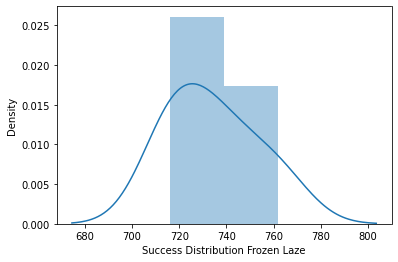

In [21]:
arr_Success=[]

for i in range(5):
  env = gym.make('FrozenLake8x8-v0')#load môi trường thường
  
  value_function, policy = policy_iteration(env) 
  success,score=play_multiple_times(env, policy, 1000)
  arr_Success.append(success)
arr_Success=np.array(arr_Success)
x = pd.Series(arr_Success, name="Success Distribution Frozen Laze")
ax = sns.distplot(x)

Policy Iteration converged at 5-th.
Number of successes: 719/1000
mean score: 1.0
Policy Iteration converged at 5-th.
Number of successes: 737/1000
mean score: 1.0
Policy Iteration converged at 5-th.
Number of successes: 751/1000
mean score: 1.0
Policy Iteration converged at 5-th.
Number of successes: 738/1000
mean score: 1.0
Policy Iteration converged at 5-th.
Number of successes: 747/1000
mean score: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


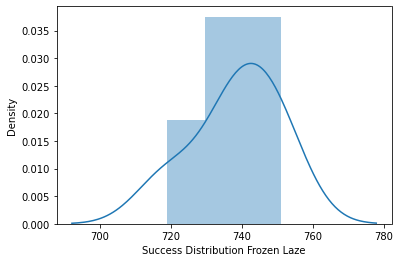

In [20]:
arr_Success=[]

for i in range(5):
  env = gym.make('FrozenLake-v0')#load môi trường thường
  
  value_function, policy = policy_iteration(env) 
  success,score=play_multiple_times(env, policy, 1000)
  arr_Success.append(success)
arr_Success=np.array(arr_Success)
x = pd.Series(arr_Success, name="Success Distribution Frozen Laze")
ax = sns.distplot(x)